In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# import test and training data
import pandas as pd
X_test = pd.read_csv('drive/My Drive/airbnb_X_test_homes.csv')
X_train = pd.read_csv('drive/My Drive/airbnb_X_train_homes.csv')
y_test = pd.read_csv('drive/My Drive/airbnb_y_test_homes.csv',names=['log_price'])
y_train = pd.read_csv('drive/My Drive/airbnb_y_train_homes.csv',names=['log_price'])
print(len(X_train))
print(len(y_train))


39019
39019


In [0]:
# Drop last review because it was not useful in prediction
X_test = X_test.drop(['last_review'], axis=1)
X_train = X_train.drop(['last_review'], axis=1)

In [0]:
# Drop unnamed column
X_test = X_test.drop(['Unnamed: 0'], axis=1)
X_train = X_train.drop(['Unnamed: 0'], axis=1)

In [7]:
print(len(X_test))
print(len(y_test))

9755
9755


In [0]:
# joblib allows us to save the models
from joblib import dump, load

In [9]:
# Run ridge CV with 25 different alphas
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet,  HuberRegressor
ridge_alphas = 10**np.linspace(3,-3,25)

scores_ridge = []
n_folds = 5

# Ridge CV
for alpha in ridge_alphas: 
  ridge_clf = Ridge(alpha=alpha)
  scoring = {'MSE': 'neg_mean_squared_error',
           'R_Squared': 'r2',
           'MAE': 'neg_mean_absolute_error'}
  scores = cross_validate(ridge_clf, X_train, y_train, cv=n_folds, scoring=scoring)
  avgDict = {}
  for k,v in scores.items():
    if (k == 'test_MSE' or k == 'test_MAE'):
      # v is the list of folds for each score
      avgDict[k] = -1*sum(v)/ float(len(v))
    elif (k == 'test_R_Squared'):
      avgDict[k] = sum(v)/ float(len(v))
  scores_ridge.append(avgDict)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.37386e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.23985e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.23002e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.21965e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.24721e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarni

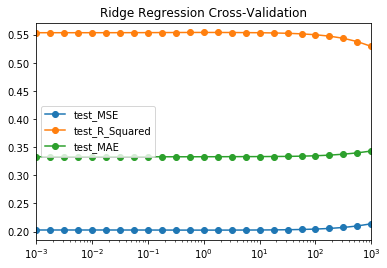

In [10]:

ridge_df = pd.DataFrame(scores_ridge,index=ridge_alphas)

ax = ridge_df.plot(title = "Ridge Regression Cross-Validation", style='-o')
ax.set_xscale('log')


In [11]:
# Which alpha preformed the best
print("Ridge Regression:")
print("   Alpha with largest R_Squared: %.4f "
      % ridge_df['test_R_Squared'].idxmax())
print("   R_Squared equals %.4f" 
      % ridge_df['test_R_Squared'].max())
print("   Alpha with smallest MSE: %.4f "
      % ridge_df['test_MSE'].idxmin())
print("   MSE equals %.4f" 
      % ridge_df['test_MSE'].min())
print("   Alpha with smallest MAE: %.4f "
      % ridge_df['test_MAE'].idxmin())
print("   MAE equals %.4f" 
      % ridge_df['test_MAE'].min())



Ridge Regression:
   Alpha with largest R_Squared: 1.0000 
   R_Squared equals 0.5542
   Alpha with smallest MSE: 1.0000 
   MSE equals 0.2026
   Alpha with smallest MAE: 0.3162 
   MAE equals 0.3330


In [12]:
# Print test results of best Ridge algorithm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
ridge_clf = Ridge(alpha=1.000)
ridge_clf.fit(X_train,y_train)
y_pred = ridge_clf.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, y_pred)
ridge_test_mae = mean_absolute_error(y_test, y_pred)
print(ridge_test_mse)
print(ridge_test_mae)

dump(ridge_clf, 'best_ridge.joblib') 
!cp best_ridge.joblib drive/My\ Drive/

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.68499e-17): result may not be accurate.
  overwrite_a=True).T


0.1951030447107048
0.32730411805253407


In [76]:
# Run lasso cross validation
lasso_alphas = 10**np.linspace(-2,-4.1,25)

scores_lasso = []
n_folds = 5

# Lasso CV
for alpha in lasso_alphas: 
  lasso_clf = Lasso(alpha=alpha)
  scoring = {'MSE': 'neg_mean_squared_error',
           'R_Squared': 'r2',
           'MAE': 'neg_mean_absolute_error'}
  scores = cross_validate(lasso_clf, X_train, y_train, cv=n_folds, scoring=scoring)
  avgDict = {}
  for k,v in scores.items():
    if (k == 'test_MSE' or k == 'test_MAE'):
      # v is the list of folds for each score
      avgDict[k] = -1*sum(v)/ float(len(v))
    elif (k == 'test_R_Squared'):
      avgDict[k] = sum(v)/ float(len(v))
  scores_lasso.append(avgDict)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.00905426135614, tolerance: 1.4154034616461697
  positive)


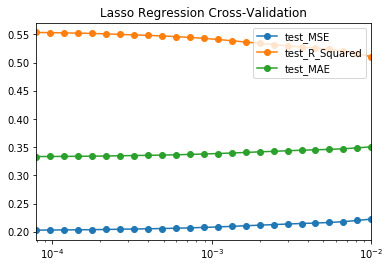

In [77]:
# Print plot of Lasso cross Validation
lasso_df = pd.DataFrame(scores_lasso,index=lasso_alphas)

ax = lasso_df.plot(title = "Lasso Regression Cross-Validation", style='-o')
ax.set_xscale('log')


In [78]:
# Print the best Lasso 
print("Lasso Regression:")
print("   Alpha with largest R_Squared: %.4f "
      % lasso_df['test_R_Squared'].idxmax())
print("   R_Squared equals %.4f" 
      % lasso_df['test_R_Squared'].max())
print("   Alpha with smallest MSE: %.4f "
      % lasso_df['test_MSE'].idxmin())
print("   MSE equals %.4f" 
      % lasso_df['test_MSE'].min())
print("   Alpha with smallest MAE: %.4f "
      % lasso_df['test_MAE'].idxmin())
print("   MAE equals %.4f" 
      % lasso_df['test_MAE'].min())


Lasso Regression:
   Alpha with largest R_Squared: 0.0001 
   R_Squared equals 0.5534
   Alpha with smallest MSE: 0.0001 
   MSE equals 0.2029
   Alpha with smallest MAE: 0.0001 
   MAE equals 0.3333


In [0]:
# Best Lasso scores
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lasso_clf = Lasso(alpha=0.000079)
lasso_clf.fit(X_train,y_train)
y_pred = lasso_clf.predict(X_test)

lasso_test_mse = mean_squared_error(y_test, y_pred)
lasso_test_mae = mean_absolute_error(y_test, y_pred)

In [80]:
# print and save lasso
print(lasso_test_mse)
print(lasso_test_mae)

dump(lasso_clf, 'best_lasso.joblib') 
!cp best_lasso.joblib drive/My\ Drive/

0.1955826096843413
0.32767600194419666


In [81]:
# Run initial gradient 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(max_depth=10, n_estimators= 500, learning_rate= 0.01, loss= 'ls', random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

gb_test_mse = mean_squared_error(y_test, gb_pred)
gb_test_mae = mean_absolute_error(y_test, gb_pred)
print(gb_test_mse)
print(gb_test_mae)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1643867603969474
0.29638561373569605


In [0]:
# Save this gradient boosting algorithm
dump(gb_clf, 'best_gb_500_estimators_10_depth.joblib') 
!cp best_gb_500_estimators_10_depth.joblib drive/My\ Drive/

In [82]:
# Print the feature importances
importances = gb_clf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

1. feature room_type_Entire home/apt (0.489438)
2. feature longitude (0.091257)
3. feature 2019 value_2 (0.090863)
4. feature latitude (0.080728)
5. feature availability_365 (0.055377)
6. feature minimum_nights (0.036704)
7. feature Closest Subway (0.032045)
8. feature reviews_per_month (0.028742)
9. feature calculated_host_listings_count (0.026544)
10. feature number_of_reviews (0.024109)
11. feature neighbourhood_Midtown (0.007772)
12. feature room_type_Private room (0.004519)
13. feature room_type_Shared room (0.004416)
14. feature neighbourhood_group_Manhattan (0.001147)
15. feature neighbourhood_Williamsburg (0.000910)
16. feature neighbourhood_Theater District (0.000864)
17. feature neighbourhood_Clinton Hill (0.000859)
18. feature neighbourhood_Bedford-Stuyvesant (0.000563)
19. feature neighbourhood_Financial District (0.000562)
20. feature neighbourhood_Tribeca (0.000481)
21. feature neighbourhood_Harlem (0.000469)
22. feature neighbourhood_Crown Heights (0.000459)
23. feature 

In [0]:
# Test for a boosting algorithm with more trees and it performed worse
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(max_depth=7, n_estimators= 1000, learning_rate= 0.01, loss= 'ls', random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

gb_test_mse = mean_squared_error(y_test, gb_pred)
gb_test_mae = mean_absolute_error(y_test, gb_pred)
print(gb_test_mse)
print(gb_test_mae)

0.1788785486784175
0.3059891926733509


In [88]:
# running cross validation on gradient boosting by varying the number of trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
estimators = [100,250,500,750,1000,1500,2000]

scores_gb = []
n_folds = 2

# Gradient Boosting CV
for e in estimators: 
  gb_clf = GradientBoostingRegressor(max_depth=5, n_estimators=e, learning_rate= 0.01, loss= 'ls')
  scoring = {'MSE': 'neg_mean_squared_error',
           'R_Squared': 'r2',
           'MAE': 'neg_mean_absolute_error'}
  scores = cross_validate(gb_clf, X_train, y_train, cv=n_folds, scoring=scoring)
  avgDict = {}
  for k,v in scores.items():
    if (k == 'test_MSE' or k == 'test_MAE'):
      # v is the list of folds for each score
      avgDict[k] = -1*sum(v)/ float(len(v))
    elif (k == 'test_R_Squared'):
      avgDict[k] = sum(v)/ float(len(v))
  scores_gb.append(avgDict)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

{'fit_time': array([343.93184829, 337.94279599]),
 'score_time': array([3.2849381 , 3.26689172]),
 'test_MAE': array([-0.31007204, -0.30694699]),
 'test_MSE': array([-0.17870336, -0.17482079]),
 'test_R_Squared': array([0.61015891, 0.61186408])}

In [0]:
# 1500 trees was the best performing model
gb_clf = GradientBoostingRegressor(max_depth=5, n_estimators=1500, learning_rate= 0.01, loss= 'ls')


Text(0.5, 0, 'Number of trees')

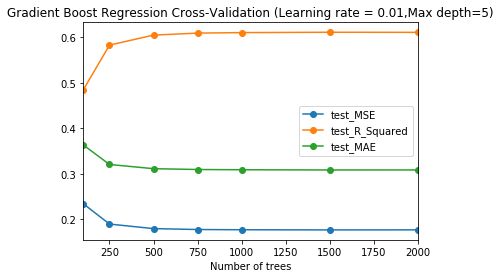

In [98]:
gb_df = pd.DataFrame(scores_gb,index=estimators)

ax = gb_df.plot(title = "Gradient Boost Regression Cross-Validation (Learning rate = 0.01,Max depth=5)", style='-o')
ax.set_xlabel('Number of trees')


Now we want to vary the depth of the trees to see if we can improve the model

In [10]:
# CV over depths 1
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import cross_validate

depths1 = [6,8]
depths2 = [10,12]
depths3 = [14,16]
depths4 = [18,20]

scores_gb_depths = []
n_folds = 2

# Gradient Boosting CV
for d in depths1: 
  gb_clf = GradientBoostingRegressor(max_depth=d, n_estimators=1500, learning_rate= 0.01, loss= 'ls')
  scoring = {'MSE': 'neg_mean_squared_error',
           'R_Squared': 'r2',
           'MAE': 'neg_mean_absolute_error'}
  scores = cross_validate(gb_clf, X_train, y_train, cv=n_folds, scoring=scoring)
  avgDict = {}
  for k,v in scores.items():
    if (k == 'test_MSE' or k == 'test_MAE'):
      # v is the list of folds for each score
      avgDict[k] = -1*sum(v)/ float(len(v))
    elif (k == 'test_R_Squared'):
      avgDict[k] = sum(v)/ float(len(v))
  scores_gb_depths.append(avgDict)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [0]:
# CV over depths2
for d in depths2: 
  gb_clf = GradientBoostingRegressor(max_depth=d, n_estimators=1500, learning_rate= 0.01, loss= 'ls')
  scoring = {'MSE': 'neg_mean_squared_error',
           'R_Squared': 'r2',
           'MAE': 'neg_mean_absolute_error'}
  scores = cross_validate(gb_clf, X_train, y_train, cv=n_folds, scoring=scoring)
  avgDict = {}
  for k,v in scores.items():
    if (k == 'test_MSE' or k == 'test_MAE'):
      # v is the list of folds for each score
      avgDict[k] = -1*sum(v)/ float(len(v))
    elif (k == 'test_R_Squared'):
      avgDict[k] = sum(v)/ float(len(v))
  scores_gb_depths.append(avgDict)

In [0]:
# CV over depths3
for d in depths3: 
  gb_clf = GradientBoostingRegressor(max_depth=d, n_estimators=1500, learning_rate= 0.01, loss= 'ls')
  scoring = {'MSE': 'neg_mean_squared_error',
           'R_Squared': 'r2',
           'MAE': 'neg_mean_absolute_error'}
  scores = cross_validate(gb_clf, X_train, y_train, cv=n_folds, scoring=scoring)
  avgDict = {}
  for k,v in scores.items():
    if (k == 'test_MSE' or k == 'test_MAE'):
      # v is the list of folds for each score
      avgDict[k] = -1*sum(v)/ float(len(v))
    elif (k == 'test_R_Squared'):
      avgDict[k] = sum(v)/ float(len(v))
  scores_gb_depths.append(avgDict)

In [0]:
# CV over depths4
for d in depths4: 
  gb_clf = GradientBoostingRegressor(max_depth=d, n_estimators=1500, learning_rate= 0.01, loss= 'ls')
  scoring = {'MSE': 'neg_mean_squared_error',
           'R_Squared': 'r2',
           'MAE': 'neg_mean_absolute_error'}
  scores = cross_validate(gb_clf, X_train, y_train, cv=n_folds, scoring=scoring)
  avgDict = {}
  for k,v in scores.items():
    if (k == 'test_MSE' or k == 'test_MAE'):
      # v is the list of folds for each score
      avgDict[k] = -1*sum(v)/ float(len(v))
    elif (k == 'test_R_Squared'):
      avgDict[k] = sum(v)/ float(len(v))
  scores_gb_depths.append(avgDict)

In [16]:
# print all of the CV values
scores_gb_depths

[{'test_MAE': 0.3075239793640612,
  'test_MSE': 0.17626138628313426,
  'test_R_Squared': 0.6121147467030803},
 {'test_MAE': 0.3067419324796593,
  'test_MSE': 0.17641965310192992,
  'test_R_Squared': 0.6117632123740862},
 {'test_MAE': 0.31041083023875216,
  'test_MSE': 0.1808641188682439,
  'test_R_Squared': 0.6019734528519085},
 {'test_MAE': 0.3154457856469452,
  'test_MSE': 0.18749663111665088,
  'test_R_Squared': 0.587380684231324},
 {'test_MAE': 0.3224944632610317,
  'test_MSE': 0.19645223545027096,
  'test_R_Squared': 0.567656656865688},
 {'test_MAE': 0.3315272802257224,
  'test_MSE': 0.2080516175038395,
  'test_R_Squared': 0.5421273913122754},
 {'test_MAE': 0.34292629615488435,
  'test_MSE': 0.22276784311428088,
  'test_R_Squared': 0.5096877807053357},
 {'test_MAE': 0.3585527704460215,
  'test_MSE': 0.24301222932686928,
  'test_R_Squared': 0.4650867202689077}]

Max Depth of 6 performed the best

In [0]:
# combine the depths list into 1 list
depths = depths1 + depths2 + depths3 + depths4

In [25]:
depths

[6, 8, 10, 12, 14, 16, 18, 20]

Text(0.5, 0, 'Max Depth')

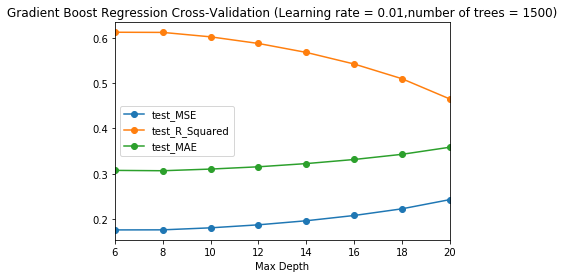

In [27]:
# Print the plot
gb_df_depths = pd.DataFrame(scores_gb_depths,index=depths)

ax = gb_df_depths.plot(title = "Gradient Boost Regression Cross-Validation (Learning rate = 0.01,number of trees = 1500)", style='-o')
ax.set_xlabel('Max Depth')

In [0]:
# Run the best gradient boosting model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(max_depth=6, n_estimators= 1500, learning_rate= 0.01, loss= 'ls', random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)


In [0]:
# Save the model
dump(gb_clf, 'gb_1500_estimators_6_depth.joblib') 
!cp gb_1500_estimators_6_depth.joblib drive/My\ Drive/

In [30]:
# Print the scores of the best gradient boosting mocel
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
gb_test_mse = mean_squared_error(y_test, gb_pred)
gb_test_mae = mean_absolute_error(y_test, gb_pred)
print(gb_test_mse)
print(gb_test_mae)

0.1637945706459631
0.29818326858873867


What if we increased the number of trees and decreased the learning rate?
Same MSE but lower MAE

In [34]:
# Test output for more trees and lower learning rate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(max_depth=10, n_estimators= 2000, learning_rate= 0.005, loss= 'ls', random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

gb_test_mse = mean_squared_error(y_test, gb_pred)
gb_test_mae = mean_absolute_error(y_test, gb_pred)
print(gb_test_mse)
print(gb_test_mae)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1637287499632492
0.2953910697469824


In [0]:
# Save the model
dump(gb_clf, 'gb_2000_estimators_10_depth_005_lr.joblib') 
!cp gb_2000_estimators_10_depth_005_lr.joblib drive/My\ Drive/

In [36]:
# Does more trees and lower learning rate improve if we decrease the max depth?
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(max_depth=6, n_estimators= 2000, learning_rate= 0.005, loss= 'ls', random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

gb_test_mse = mean_squared_error(y_test, gb_pred)
gb_test_mae = mean_absolute_error(y_test, gb_pred)
print(gb_test_mse)
print(gb_test_mae)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.16433114328182374
0.2987821427066693


Decreasing the max depth of this gradient boosting model did not imporve the MSE or MAE

In [0]:
# Save the model
dump(gb_clf, 'gb_2000_estimators_6_depth_005_lr.joblib') 
!cp gb_2000_estimators_6_depth_005_lr.joblib drive/My\ Drive/

In [38]:
# Look at the importances of this model
importances = gb_clf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

1. feature room_type_Entire home/apt (0.577709)
2. feature 2019 value_2 (0.100897)
3. feature longitude (0.074235)
4. feature latitude (0.058107)
5. feature availability_365 (0.049481)
6. feature minimum_nights (0.033807)
7. feature calculated_host_listings_count (0.022374)
8. feature reviews_per_month (0.017607)
9. feature number_of_reviews (0.015522)
10. feature Closest Subway (0.008722)
11. feature neighbourhood_Midtown (0.008131)
12. feature room_type_Shared room (0.005831)
13. feature neighbourhood_group_Manhattan (0.005340)
14. feature room_type_Private room (0.004954)
15. feature neighbourhood_Williamsburg (0.001650)
16. feature neighbourhood_Sea Gate (0.000712)
17. feature neighbourhood_Riverdale (0.000679)
18. feature neighbourhood_Clinton Hill (0.000659)
19. feature neighbourhood_Theater District (0.000486)
20. feature neighbourhood_Murray Hill (0.000485)
21. feature neighbourhood_Tribeca (0.000480)
22. feature neighbourhood_Chinatown (0.000466)
23. feature neighbourhood_Asto

For this model the home prices is very important

In [0]:
import joblib
from joblib import dump, load
loaded_model = joblib.load('drive/My Drive/gb_2000_estimators_10_depth_005_lr.joblib')

In [13]:
# Print the results of this model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
train_pred = loaded_model.predict(X_train)
test_pred = loaded_model.predict(X_test)
loaded_model_results = pd.DataFrame({'algorithm':['GB 2000 Trees, Depth 10, LR 0.005'],
            'training MSE': [mean_squared_error(y_train, train_pred)],
            'test MSE': [mean_squared_error(y_test, test_pred)],
            'training r2': [r2_score(y_train, train_pred)],
            'test r2': [r2_score(y_test, test_pred)],
            'training MAE': [mean_absolute_error(y_train, train_pred)],
            'test MAE': [mean_absolute_error(y_test, test_pred)]})
loaded_model_results

,algorithm,training MSE,test MSE,training r2,test r2,training MAE,test MAE
0,"GB 2000 Trees, Depth 10, LR 0.005",0.082378,0.163729,0.818715,0.635991,0.216177,0.295391


In [15]:
import numpy as np
# Look at the importances of this model
importances = loaded_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("10 most important features for GB regressor with 2000 trees, Max depth of 10, and 0.005 Learning rate")
for f in range(10):
    
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

10 most important features for GB regressor with 2000 trees, Max depth of 10, and 0.005 Learning rate
1. feature room_type_Entire home/apt (0.474472)
2. feature longitude (0.093576)
3. feature 2019 value_2 (0.088376)
4. feature latitude (0.083744)
5. feature availability_365 (0.057095)
6. feature minimum_nights (0.037136)
7. feature Closest Subway (0.036049)
8. feature reviews_per_month (0.030773)
9. feature calculated_host_listings_count (0.027010)
10. feature number_of_reviews (0.025133)


This is a better performing model than the previous model. It places greater importance on Longitude and Closest Subway.

In [0]:
# load model
loaded_model = joblib.load('drive/My Drive/gb_2000_estimators_6_depth_005_lr.joblib')

In [19]:
# Print the results of this model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
train_pred = loaded_model.predict(X_train)
test_pred = loaded_model.predict(X_test)
loaded_model_results = pd.DataFrame({'algorithm':['GB 2000 Trees, Depth 6, LR 0.005'],
            'training MSE': [mean_squared_error(y_train, train_pred)],
            'test MSE': [mean_squared_error(y_test, test_pred)],
            'training r2': [r2_score(y_train, train_pred)],
            'test r2': [r2_score(y_test, test_pred)],
            'training MAE': [mean_absolute_error(y_train, train_pred)],
            'test MAE': [mean_absolute_error(y_test, test_pred)]})
loaded_model_results

,algorithm,training MSE,test MSE,training r2,test r2,training MAE,test MAE
0,"GB 2000 Trees, Depth 6, LR 0.005",0.149095,0.164331,0.671892,0.634652,0.28641,0.298782


In [20]:

# Look at the importances of this model
importances = loaded_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("10 most important features for GB regressor with 2000 trees, Max depth of 6, and 0.005 Learning rate")
for f in range(10):
    
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

10 most important features for GB regressor with 2000 trees, Max depth of 6, and 0.005 Learning rate
1. feature room_type_Entire home/apt (0.577709)
2. feature 2019 value_2 (0.100897)
3. feature longitude (0.074235)
4. feature latitude (0.058107)
5. feature availability_365 (0.049481)
6. feature minimum_nights (0.033807)
7. feature calculated_host_listings_count (0.022374)
8. feature reviews_per_month (0.017607)
9. feature number_of_reviews (0.015522)
10. feature Closest Subway (0.008722)


With less max depth this model places more importance on the home prices and less on the subway data.

In [0]:
# load model
loaded_model = joblib.load('drive/My Drive/gb_1500_estimators_6_depth.joblib')

In [22]:
# Print the results of this model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
train_pred = loaded_model.predict(X_train)
test_pred = loaded_model.predict(X_test)
loaded_model_results = pd.DataFrame({'algorithm':['GB 1500 Trees, Depth 6, LR 0.01'],
            'training MSE': [mean_squared_error(y_train, train_pred)],
            'test MSE': [mean_squared_error(y_test, test_pred)],
            'training r2': [r2_score(y_train, train_pred)],
            'test r2': [r2_score(y_test, test_pred)],
            'training MAE': [mean_absolute_error(y_train, train_pred)],
            'test MAE': [mean_absolute_error(y_test, test_pred)]})
loaded_model_results

,algorithm,training MSE,test MSE,training r2,test r2,training MAE,test MAE
0,"GB 1500 Trees, Depth 6, LR 0.01",0.143847,0.163795,0.683441,0.635845,0.281333,0.298183


In [23]:

# Look at the importances of this model
importances = loaded_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("10 most important features for GB regressor with 1500 trees, Max depth of 6, and 0.01 Learning rate")
for f in range(10):
    
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

10 most important features for GB regressor with 1500 trees, Max depth of 6, and 0.01 Learning rate
1. feature room_type_Entire home/apt (0.568057)
2. feature 2019 value_2 (0.099655)
3. feature longitude (0.075731)
4. feature latitude (0.059953)
5. feature availability_365 (0.050472)
6. feature minimum_nights (0.034072)
7. feature calculated_host_listings_count (0.023063)
8. feature reviews_per_month (0.018865)
9. feature number_of_reviews (0.016256)
10. feature Closest Subway (0.010709)


In [0]:
# load model
loaded_model = joblib.load('drive/My Drive/best_gb_500_estimators_10_depth.joblib')

In [25]:
# Print the results of this model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
train_pred = loaded_model.predict(X_train)
test_pred = loaded_model.predict(X_test)
loaded_model_results = pd.DataFrame({'algorithm':['GB 500 Trees, Depth 10, LR 0.01'],
            'training MSE': [mean_squared_error(y_train, train_pred)],
            'test MSE': [mean_squared_error(y_test, test_pred)],
            'training r2': [r2_score(y_train, train_pred)],
            'test r2': [r2_score(y_test, test_pred)],
            'training MAE': [mean_absolute_error(y_train, train_pred)],
            'test MAE': [mean_absolute_error(y_test, test_pred)]})
loaded_model_results

,algorithm,training MSE,test MSE,training r2,test r2,training MAE,test MAE
0,"GB 500 Trees, Depth 10, LR 0.01",0.093902,0.164387,0.793353,0.634528,0.231735,0.296386


In [27]:

# Look at the importances of this model
importances = loaded_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("10 most important features for GB regressor with 500 trees, Max depth of 10, and 0.01 Learning rate")
for f in range(10):
    
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

10 most important features for GB regressor with 500 trees, Max depth of 10, and 0.01 Learning rate
1. feature room_type_Entire home/apt (0.489438)
2. feature longitude (0.091257)
3. feature 2019 value_2 (0.090863)
4. feature latitude (0.080728)
5. feature availability_365 (0.055377)
6. feature minimum_nights (0.036704)
7. feature Closest Subway (0.032045)
8. feature reviews_per_month (0.028742)
9. feature calculated_host_listings_count (0.026544)
10. feature number_of_reviews (0.024109)
